In [90]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
# Importing the dataset
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [92]:
X = dataset.iloc[:, 5].values
y = dataset.iloc[:, 2].values

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.5, random_state = 1)

In [94]:
def polynomial_dict(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_dict = {}
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_dict['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            feature_power = [number**power for number in feature]
            poly_dict[name] = feature_power

    return poly_dict

In [95]:
tmp = [1,2,3]
polynomial_dict(tmp , 3)

{'power_1': [1, 2, 3], 'power_2': [1, 4, 9], 'power_3': [1, 8, 27]}

In [96]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

arr = []
for degree in range(1, 15):

    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

    
    regressor = Ridge(alpha = 500000.0)
    regressor.fit(X_poly, y_train)

    # Predicting the Test set results
    y_valid_pred = regressor.predict(poly_reg.fit_transform(X_valid.reshape(-1,1)))
    
    mse = mean_squared_error(y_valid, y_valid_pred)
    arr.append(mse)

C:\Users\Aman\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7211006642323236e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.822544783397582e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.033266753276521e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [97]:
# Note that list index starts from 0, so degree = index + 1
print(arr.index(min(arr)), min(arr))

8 63880241620.9


In [98]:
for value in arr :
    print("%E" % value)

6.791034E+10
6.664326E+10
6.803509E+10
7.042302E+10
6.827467E+10
7.409633E+10
1.862990E+11
1.040941E+11
6.388024E+10
6.481975E+10
2.091114E+13
4.893877E+13
2.083385E+15
2.233489E+15


In [99]:
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

    
regressor = Ridge(alpha = 500000.0)
regressor.fit(X_poly, y_train)
# Predicting the Test set results
y_test_pred = regressor.predict(poly_reg.fit_transform(X_test.reshape(-1,1)))
    
mse = mean_squared_error(y_test, y_test_pred)

print("%E" % mse)

6.914454E+10


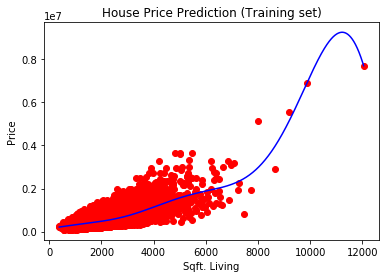

In [100]:
#Visualizing the Ridge Regression  Training Set Results
X_train_grid = np.arange(min(X_train),max(X_train),0.1)
X_train_grid = X_train_grid.reshape((len(X_train_grid),1))
plt.scatter(X_train , y_train ,color = 'red')
plt.plot(X_train_grid , regressor.predict(poly_reg.fit_transform(X_train_grid)) , color = 'blue')
plt.title('House Price Prediction (Training set)')
plt.xlabel('Sqft. Living')
plt.ylabel('Price')
plt.show()

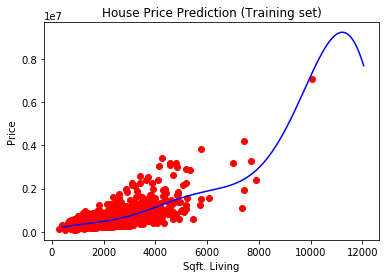

In [101]:
#Visualizing the Polynomial Regression Test Set Results
X_test_grid = np.arange(min(X_test),max(X_test),0.1)
X_test_grid = X_test_grid.reshape((len(X_test_grid),1))
plt.scatter(X_test, y_test ,color = 'red')
plt.plot(X_train_grid , regressor.predict(poly_reg.fit_transform(X_train_grid)) , color = 'blue')
plt.title('House Price Prediction (Training set)')
plt.xlabel('Sqft. Living')
plt.ylabel('Price')
plt.show()

In [102]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10